# Analyse the Customer Behaviour in Entertainment Industry
Prepaired by- **Pratap Kumar Nayak**

# Data acquisition

In [1]:
# library for importing datasets

import pandas as pd

In [2]:
# movies dataset

movies_data = pd.read_table(r"C:\Users\PKN\Data_Science\DS_w_Python\Final Projects\Project_Movielens_DataSets\movies.dat", sep='::', names = ['MovieID', 'Title', 'Genres'])

C:\Users\PKN\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
movies_data.shape

(3883, 3)

In [4]:
movies_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# ratings dataset

ratings_data = pd.read_table(r"C:\Users\PKN\Data_Science\DS_w_Python\Final Projects\Project_Movielens_DataSets\ratings.dat", sep='::', names = ['UserID', 'MovieID', 'Ratings','TimeStamp'])

C:\Users\PKN\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
ratings_data.shape

(1000209, 4)

In [7]:
ratings_data.head()

,UserID,MovieID,Ratings,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
# ratings dataset

users_data = pd.read_table(r"C:\Users\PKN\Data_Science\DS_w_Python\Final Projects\Project_Movielens_DataSets\users.dat", sep='::', names = ['UserID', 'Gender', 'Age','Occupation','Zip-Code'])

C:\Users\PKN\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
users_data.shape

(6040, 5)

In [10]:
users_data.head()

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


#### Creating a new Master Dataset by merging the previous 3 datasets

In [11]:
movielens = movies_data.merge(ratings_data, on = 'MovieID', how = 'inner').merge(users_data, on = 'UserID', how = 'inner')

In [12]:
movielens.shape

(1000209, 10)

In [13]:
movielens.head()

,MovieID,Title,Genres,UserID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


# Exploratory Data Analysis (EDA)

##### Visualize user age distribution

In [14]:
# Users with Different Age Groups

movielens['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

In [15]:
# libraries for ploting

import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'User Counts')

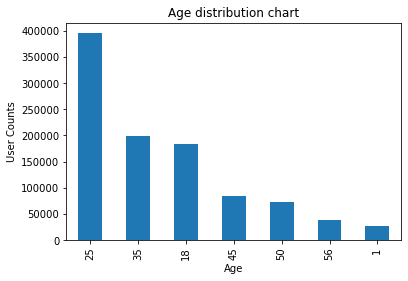

In [16]:
movielens['Age'].value_counts().plot(kind='bar')
plt.title('Age distribution chart')
plt.xlabel('Age')
plt.ylabel('User Counts')

In [17]:
# --------------------EXTRA-------------------------
# --------Another style of plotting-----------
# libraries for ploting

import seaborn as sns

C:\Users\PKN\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='count'>

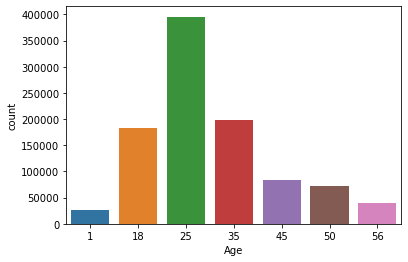

In [18]:
# --------------------EXTRA-------------------------

sns.countplot(movielens['Age'])

C:\Users\PKN\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Occupation', ylabel='count'>

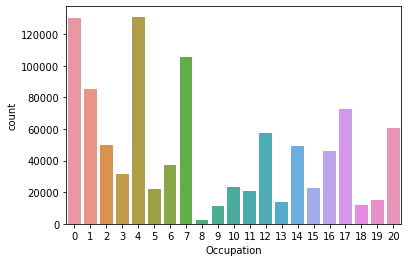

In [19]:
# --------------------EXTRA-------------------------

sns.countplot(movielens['Occupation'])

<AxesSubplot:>

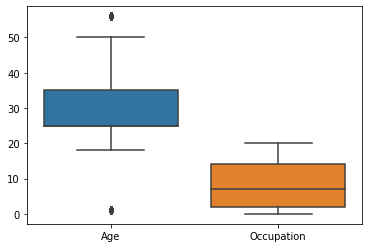

In [20]:
# --------------------EXTRA-------------------------
# checking correletion between 'Age' and 'Occupation'

slice_movielens = pd.DataFrame(movielens[['Age','Occupation']])
sns.boxplot(data = slice_movielens)

C:\Users\PKN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

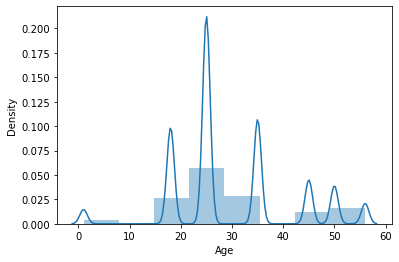

In [21]:
# --------------------EXTRA-------------------------

sns.distplot(movielens['Age'], bins=8)

##### Viusalize overall rating by users

In [22]:
# Check 'Ratings' Distribution

movielens.groupby('Ratings', axis=0).UserID.count()

Ratings
1     56174
2    107557
3    261197
4    348971
5    226310
Name: UserID, dtype: int64

<AxesSubplot:xlabel='Ratings'>

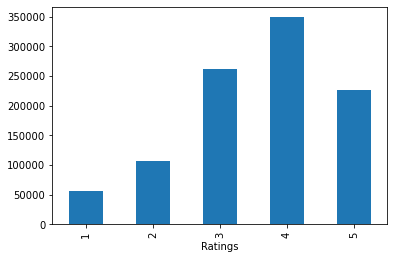

In [23]:
# Visualize

movielens.groupby('Ratings', axis=0).UserID.count().plot(kind='bar')

C:\Users\PKN\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Ratings', ylabel='count'>

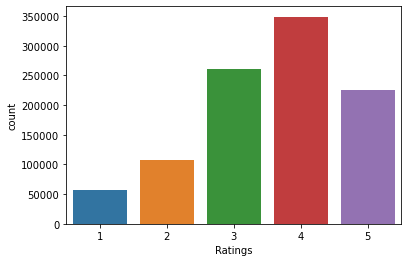

In [24]:
# --------------------EXTRA-------------------------

sns.countplot(movielens['Ratings'])

##### visualize the user rating of the movie 'Toy Story'

In [25]:
toystoryRating = movielens[movielens['Title'].str.contains('Toy Story') == True]
toystoryRating

,MovieID,Title,Genres,UserID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


In [26]:
toystoryRating.groupby(["Title","Ratings"]).size()

Title               Ratings
Toy Story (1995)    1           16
                    2           61
                    3          345
                    4          835
                    5          820
Toy Story 2 (1999)  1           25
                    2           44
                    3          214
                    4          578
                    5          724
dtype: int64

C:\Users\PKN\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Ratings', ylabel='count'>

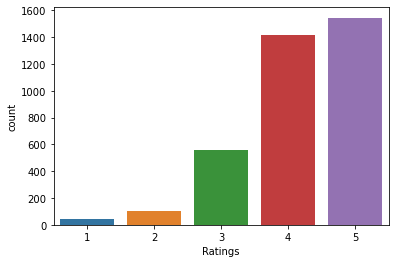

In [27]:
# Visualize

sns.countplot(toystoryRating['Ratings'])

C:\Users\PKN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PKN\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='Ratings'>

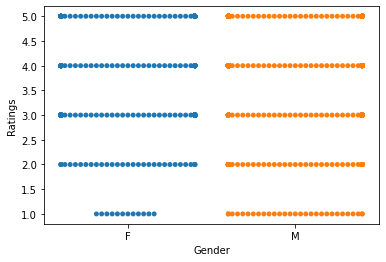

In [28]:
sns.swarmplot(x = 'Gender', y = 'Ratings', data = toystoryRating)

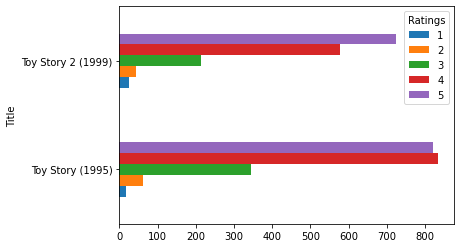

In [29]:
toystoryRating.groupby(["Title","Ratings"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

##### visualize the viewership of the movie "Toy Story" by age group

<AxesSubplot:xlabel='Age'>

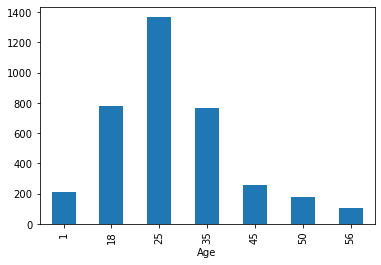

In [30]:
toystoryRating.groupby('Age', axis = 0).Ratings.count().plot(kind = 'bar')

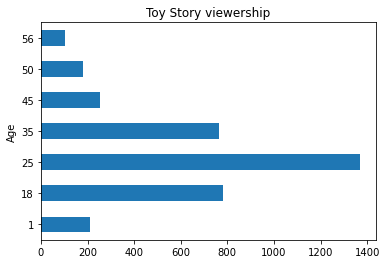

In [31]:
toystoryRating.groupby(["Age"]).size().plot(kind='barh')
plt.title('Toy Story viewership')
plt.show()

##### visualize the top 25 movies by viewership

In [32]:
top25Movies = movielens.groupby('Title').size().sort_values(ascending=False)[:25]
top25Movies

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

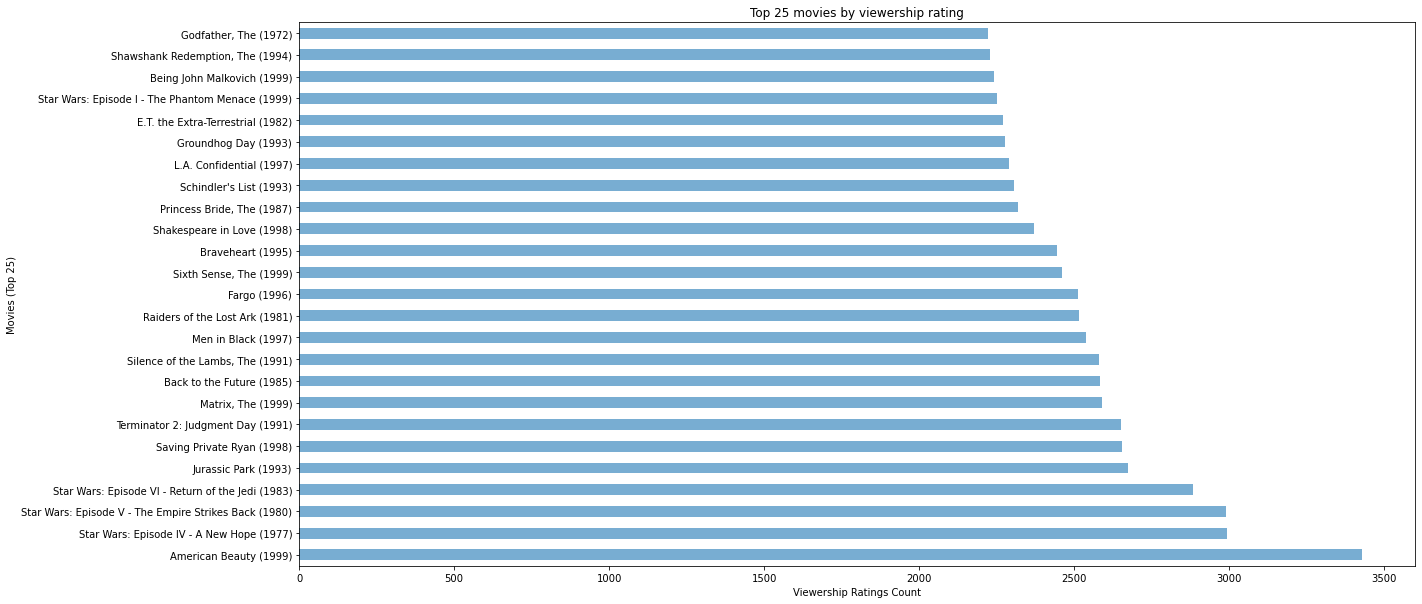

In [33]:
top25Movies.plot(kind='barh',alpha=0.6,figsize=(20,10))
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating")
plt.show()

##### rating for a particular user of user id = 2696

In [34]:
id2696Rating = movielens[movielens.UserID == 2696]
id2696Rating

,MovieID,Title,Genres,UserID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-Code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


##### Visualize the rating data by user of user if = 2696

C:\Users\PKN\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Ratings', ylabel='count'>

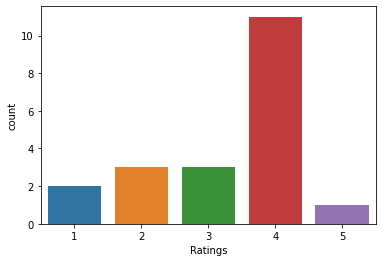

In [35]:
sns.countplot(id2696Rating['Ratings'])

<AxesSubplot:xlabel='Ratings'>

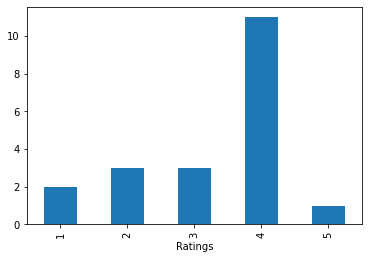

In [36]:
movielens[movielens.UserID == 2696].groupby('Ratings').Ratings.count().plot(kind='bar')

In [37]:
sliceData = pd.DataFrame(movielens.iloc[0:10000, :])

In [38]:
sliceData.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Ratings', 'TimeStamp',
       'Gender', 'Age', 'Occupation', 'Zip-Code'],
      dtype='object')

<AxesSubplot:xlabel='Occupation', ylabel='Genres'>

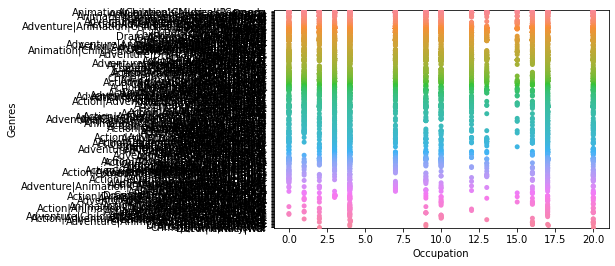

In [39]:
sns.stripplot(y = 'Genres', x = 'Occupation', data = sliceData)

# Perform Machine Learning

##### first 500 extracted records on MovieID, Age, Occupation with Rating as label

In [40]:
movielens.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Ratings', 'TimeStamp',
       'Gender', 'Age', 'Occupation', 'Zip-Code'],
      dtype='object')

In [41]:
first500 = movielens.iloc[:500, [0,7,8,4]]

In [42]:
first500.shape

(500, 4)

In [43]:
first500.head()

,MovieID,Age,Occupation,Ratings
0,1,1,10,5
1,48,1,10,5
2,150,1,10,5
3,260,1,10,4
4,527,1,10,5


In [44]:
fetaures = first500.iloc[:,[0,1,2]].values
label = first500.iloc[:,-1].values

##### Create train and test data

In [45]:
#import library for ML model

from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(fetaures, label, test_size=0.2, random_state=0)

### Let's create the ML Model for prediction

In [47]:
# import KNN model library

from sklearn.neighbors import KNeighborsClassifier

In [48]:
knnmodel = KNeighborsClassifier(n_neighbors = 7)
knnmodel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [49]:
print('Accuracy on training data:', knnmodel.score(x_train, y_train))

Accuracy on training data: 0.5125


In [50]:
print('Accuracy on test data:', knnmodel.score(x_test, y_test))

Accuracy on test data: 0.35


_The accuracy score is **very bad** because we are feeding only 500 data points_

In [51]:
y_pred = knnmodel.predict(x_test)
y_pred

array([4, 4, 4, 5, 4, 5, 4, 4, 3, 4, 4, 4, 4, 4, 5, 5, 3, 4, 3, 3, 4, 4,
       4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 5, 4, 5, 5, 4, 3, 4, 4, 4, 3,
       4, 4, 4, 4, 5, 3, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 3, 4, 5, 4, 3,
       4, 3, 5, 4, 3, 5, 3, 4, 5, 4, 4, 3, 4, 5, 4, 3, 4, 3, 3, 4, 5, 3,
       3, 4, 3, 4, 3, 4, 5, 4, 5, 5, 4, 4], dtype=int64)

_MovieID Plot_

(array([98., 76., 90., 49., 45., 32., 26., 27., 38., 19.]),
 array([1.0000e+00, 3.9570e+02, 7.9040e+02, 1.1851e+03, 1.5798e+03,
        1.9745e+03, 2.3692e+03, 2.7639e+03, 3.1586e+03, 3.5533e+03,
        3.9480e+03]),
 <BarContainer object of 10 artists>)

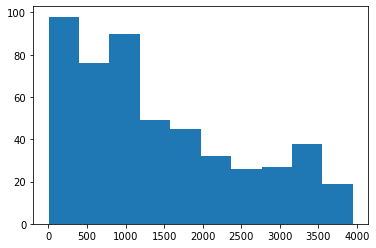

In [52]:
plt.hist(first500.MovieID)

_Age Plot_

(array([ 53.,   0.,   0.,   0., 245.,   0., 131.,   0.,   0.,  71.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <BarContainer object of 10 artists>)

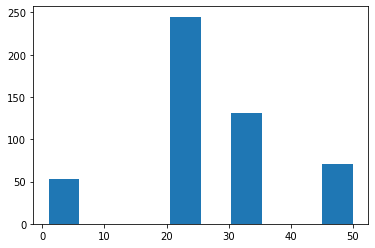

In [53]:
plt.hist(first500.Age)

_Occupation Plot_

(array([131.,   0.,   0.,   0.,   0., 124., 139.,   0.,   0., 106.]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <BarContainer object of 10 artists>)

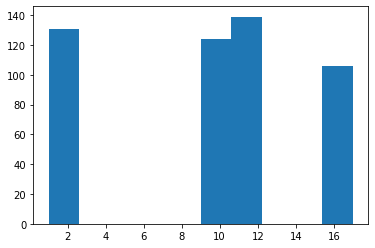

In [54]:
plt.hist(first500.Occupation)

In [55]:
# import SVC model library

from sklearn.svm import SVC

In [56]:
svcModel = SVC(gamma='auto')
svcModel.fit(x_train, y_train)

SVC(gamma='auto')

In [57]:
print('Accuracy on training data:', svcModel.score(x_train, y_train))

Accuracy on training data: 0.9775


In [58]:
print('Accuracy on test data:', svcModel.score(x_test, y_test))

Accuracy on test data: 0.37


(array([[131., 124., 139., 106.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 53.,   0.,   0.,   0., 245.,   0., 131.,   0.,   0.,  71.]]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <a list of 2 BarContainer objects>)

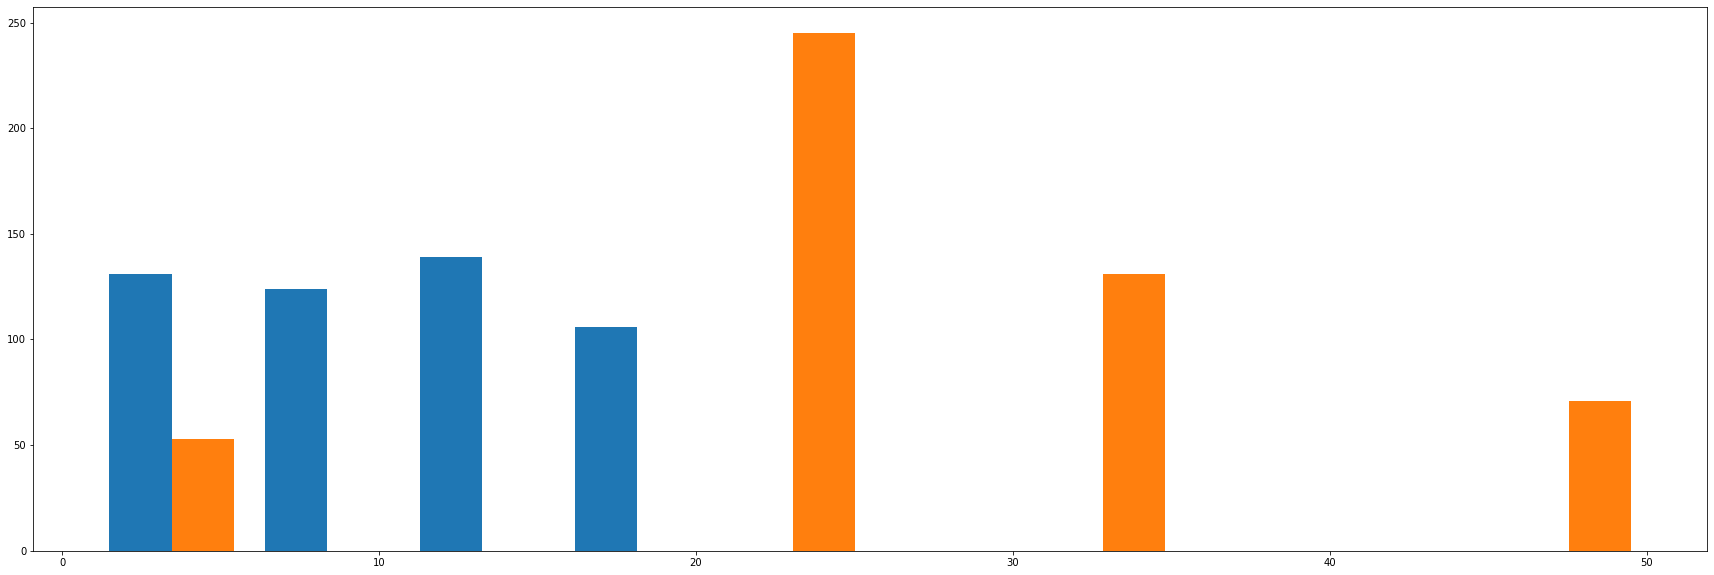

In [59]:
# Visualize

plt.figure( figsize=(30,10))
#plt.xscale('log')
plt.hist([first500.Occupation,first500.Age], bins=10, label=['Occupation','Age',])
#plt.hist(combinedData.Age)